In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### 구조
- fish_data
    - train_input, test_input
- fish target
    - train_target, test_target

In [3]:
# 1

cond = df['Species'].isin(['Bream','Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [5]:
# 2

fish_target = df.loc[cond, ['Species']]
#fish_target

In [7]:
# 3

from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target) # 두개의 인덱스를 섞고 잘라줌.

In [10]:
# 잘 잘렸는지 확인
# len(train_input) # 36
# len(train_target)

# len(test_target) # 13
# len(test_target)

36

In [15]:
test_target

,Species
11,Bream
33,Bream
3,Bream
157,Smelt
8,Bream
156,Smelt
9,Bream
34,Bream
24,Bream
158,Smelt


In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [17]:
kn.score(test_input, test_target['Species'])

1.0

In [18]:
kn.predict([[25,150]]) #[25,150] 위치가 빙어[smelt]라고 판단.

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

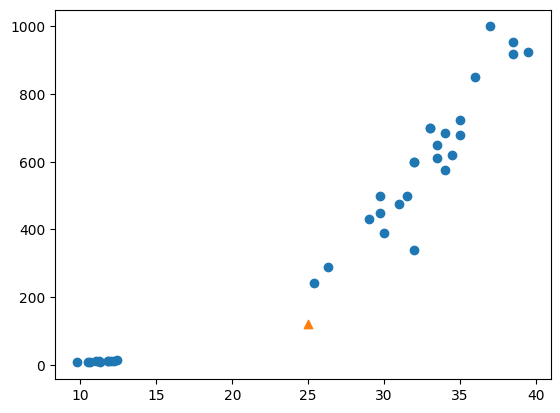

In [20]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25,120,marker = '^')

In [21]:
kn.kneighbors([[25,120]]) # [25,120]와 가까이 있는 데이터의 거리를 보여줌. 

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[107.34207004, 108.55726599, 110.78916915, 110.88845747,
         110.96413835]]),
 array([[27, 10,  3,  4, 31]]))

In [23]:
# 점수 -> 표준 점수로 바꾸기 (평균 빼고 표준편차 나누기)

mean = train_input.mean()
std = train_input.std()

print(mean)
print(std)

Length2     26.338889
Weight     431.019444
dtype: float64
Length2     10.522229
Weight     331.225128
dtype: float64


In [26]:
# 표준 점수 구하기

train_scaled = (train_input - mean) / std # mean = 27

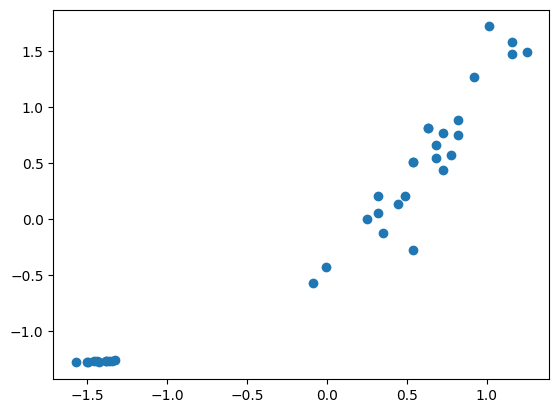

In [28]:
# x축과 y축의 간격 동일화

plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [29]:
# 학습

kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [30]:
# 평가 : 평가를 할때도 표준 점수화해야 함. (학습에 표준점수화 했으므로)

test_scaled = (test_input - mean) / std

In [31]:
kn.score(test_scaled, test_target)

1.0

In [33]:
new = ([25,150] - mean) / std
new

Length2   -0.127244
Weight    -0.848424
dtype: float64

In [34]:
kn.predict([new])

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)